In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def ReLU(x):
    return np.clip(x, 0,np.inf)

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3
 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1
 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9
 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]


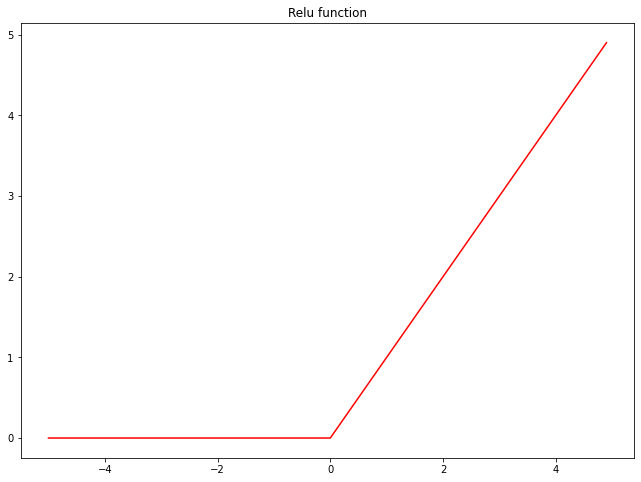

In [15]:
z = np.arange(-5,5,0.1)
RelU_z = ReLU(z)

print(RelU_z)
plt.figure(figsize=(11,8))
plt.plot(z,RelU_z,'r-')
plt.title('Relu function')
plt.show()

# 1 input, 3H unit, 1output

In [22]:
def relu(x):
    return np.maximum(0, x)

def shallow_1_1_3(x, activation_fn, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
    # Compute the preactivations
    pre_1 = theta_10 + x * theta_11
    pre_2 = theta_20 + x * theta_21
    pre_3 = theta_30 + x * theta_31

    # Pass preactivations through the ReLU activation function
    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)

    # Weight the activations
    w_act_1 = phi_1 * act_1
    w_act_2 = phi_2 * act_2
    w_act_3 = phi_3 * act_3

    # Combine weighted activations and add phi_0 to create the output
    y = phi_0 + w_act_1 + w_act_2 + w_act_3

    # Return all calculated values
    return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3


In [23]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

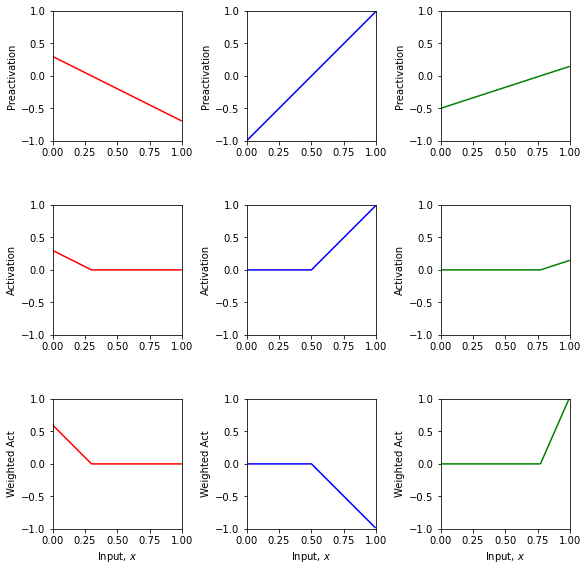

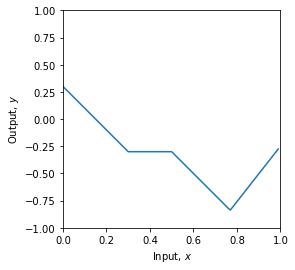

In [24]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, relu, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

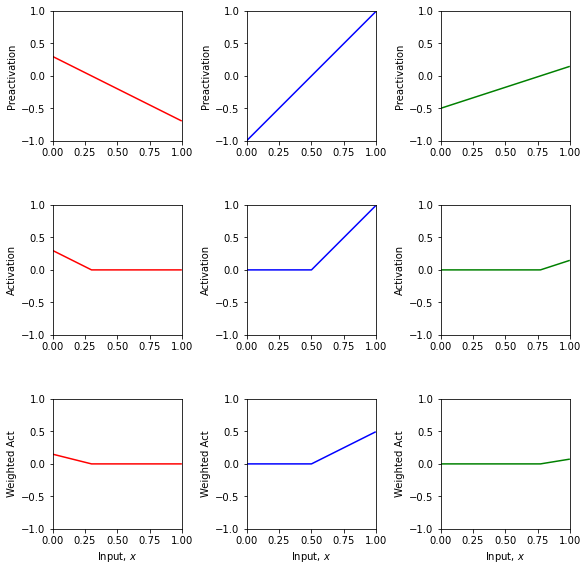

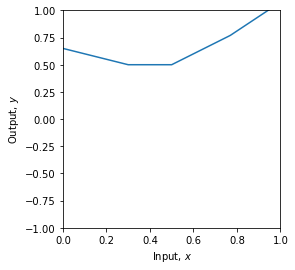

In [26]:
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.5; phi_1 = .5; phi_2 = .5; phi_3 = .5

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

In [27]:
def least_squares_loss(y_train, y_predict):
    # Compute the sum of squared differences between y_train and y_predict
    loss = np.sum((y_train - y_predict) ** 2)
    return loss

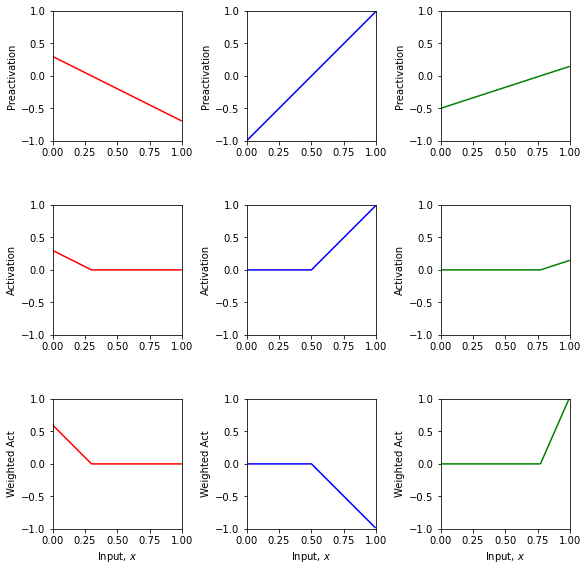

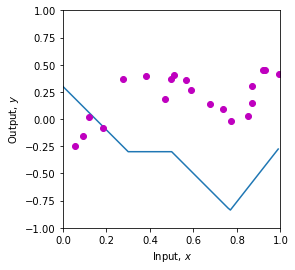

Loss = 9.385


In [33]:
# Now lets define some parameters, run the neural network, and compute the loss
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,\
                    0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444, \
                    0.148038840,0.26824970])

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data = x_train, y_data = y_train)

# Run the neural network on the training data
y_predict, *_ = shallow_1_1_3(x_train, relu, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Compute the least squares loss and print it out
loss = least_squares_loss(y_train,y_predict)
print("Loss = %3.3f"%(loss))



# 2 input, 3H unit, 1output

In [42]:
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation


In [43]:
# Define a shallow neural network with, two input, one output, and three hidden units
def shallow_2_1_3(x1,x2, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):
    # Compute the preactivations
    pre_1 = theta_10 + x1 * theta_11 + x2 * theta_12
    pre_2 = theta_20 + x1 * theta_21 + x2 * theta_22
    pre_3 = theta_30 + x1 * theta_31 + x2 * theta_32

    # Pass preactivations through the ReLU activation function
    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)

    # Weight the activations
    w_act_1 = phi_1 * act_1
    w_act_2 = phi_2 * act_2
    w_act_3 = phi_3 * act_3

    # Combine weighted activations and add phi_0 to create the output
    y = phi_0 + w_act_1 + w_act_2 + w_act_3
    return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [44]:
# Code to draw 2D function -- read it so you know what is going on, but you don't have to change it
def draw_2D_function(ax, x1_mesh, x2_mesh, y):
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')

# Plot the shallow neural network.  We'll assume input in is range [0,10],[0,10] and output [-10,10]
def plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3):

  fig, ax = plt.subplots(3,3)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
  draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
  draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')
  draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
  draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
  draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
  draw_2D_function(ax[2,0], x1,x2,w_act_1); ax[2,0].set_title('Weighted Act')
  draw_2D_function(ax[2,1], x1,x2,w_act_2); ax[2,1].set_title('Weighted Act')
  draw_2D_function(ax[2,2], x1,x2,w_act_3); ax[2,2].set_title('Weighted Act')
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y)
  ax.set_title('Network output, ')
  ax.set_aspect(1.0)
  plt.show()

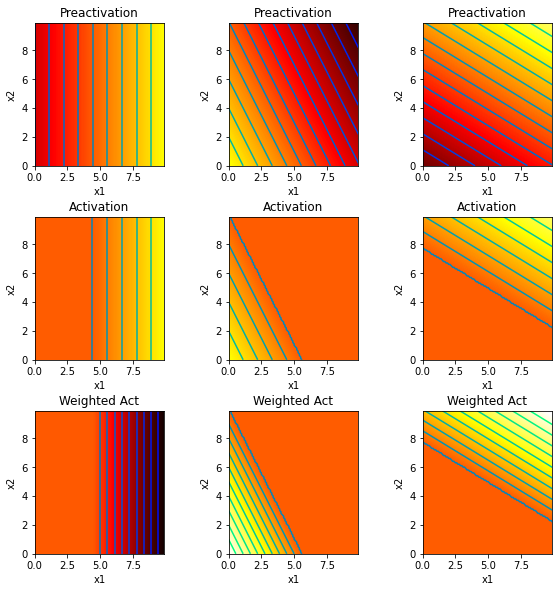

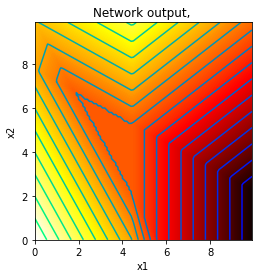

In [47]:
# Now lets define some parameters and run the neural network
theta_10 =  -4.0 ;  theta_11 = 0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -7  ; theta_31 = 0.5; theta_32 = 0.9
phi_0 = 0.0; phi_1 = -2.0; phi_2 = 2.0; phi_3 = 1.5

x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_2_1_3(x1,x2, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# And then plot it
plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3)

# 2 input, 3H unit, 2output

In [52]:
# Plot the shallow neural network.  We'll assume input in is range [0,10],[0,10] and output [-10,10]
def plot_neural_2_inputs_2_outputs(x1,x2, y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23):

    # Plot intermediate plots if flag set
    fig, ax = plt.subplots(4,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
    draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
    draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')
    draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
    draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
    draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
    draw_2D_function(ax[2,0], x1,x2,w_act_11); ax[2,0].set_title('Weighted Act 1')
    draw_2D_function(ax[2,1], x1,x2,w_act_12); ax[2,1].set_title('Weighted Act 1')
    draw_2D_function(ax[2,2], x1,x2,w_act_13); ax[2,2].set_title('Weighted Act 1')
    draw_2D_function(ax[3,0], x1,x2,w_act_21); ax[3,0].set_title('Weighted Act 2')
    draw_2D_function(ax[3,1], x1,x2,w_act_22); ax[3,1].set_title('Weighted Act 2')
    draw_2D_function(ax[3,2], x1,x2,w_act_23); ax[3,2].set_title('Weighted Act 2')
    plt.show()

    fig, ax = plt.subplots()
    draw_2D_function(ax,x1,x2,y1)
    ax.set_title('Network output, $y_1$')
    ax.set_aspect(1.0)
    plt.show()

    fig, ax = plt.subplots()
    draw_2D_function(ax,x1,x2,y2)
    ax.set_title('Network output, $y_2$')
    ax.set_aspect(1.0)
    plt.show()

In [53]:
# Define a shallow neural network with, two inputs, two outputs, and three hidden units
def shallow_2_2_3(x1,x2, activation_fn, phi_10,phi_11,phi_12,phi_13, phi_20,phi_21,phi_22,phi_23, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):
    pre_1 = theta_10 + x1 * theta_11 + x2 * theta_12
    pre_2 = theta_20 + x1 * theta_21 + x2 * theta_22
    pre_3 = theta_30 + x1 * theta_31 + x2 * theta_32
    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)
    w_act_11 = phi_11 * act_1
    w_act_12 = phi_12 * act_2
    w_act_13 = phi_13 * act_3
    w_act_21 = phi_21 * act_1
    w_act_22 = phi_22 * act_2
    w_act_23 = phi_23 * act_3
    y1 = phi_10 + w_act_11 + w_act_12 + w_act_13
    y2 = phi_20 + w_act_21 + w_act_22 + w_act_23


  # Return everything we have calculated
    return y1,y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23

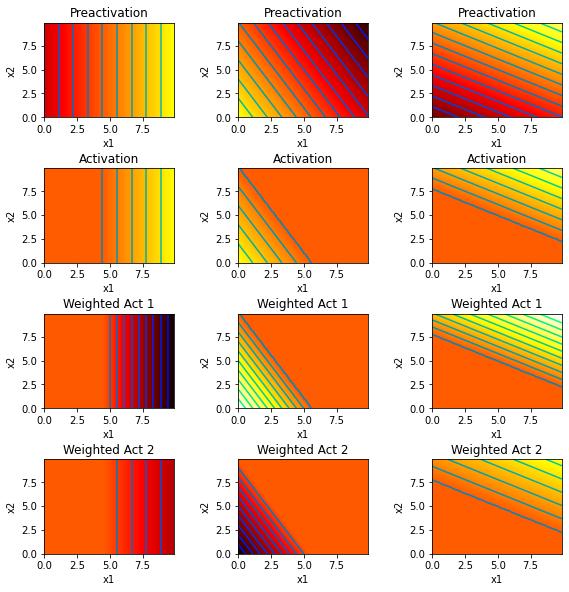

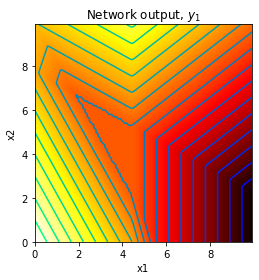

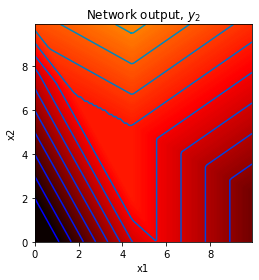

In [54]:
# Now lets define some parameters and run the neural network
theta_10 =  -4.0 ;  theta_11 = 0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -7  ; theta_31 = 0.5; theta_32 = 0.9
phi_10 = 0.0; phi_11 = -2.0; phi_12 = 2.0; phi_13 = 1.5
phi_20 = -2.0; phi_21 = -1.0; phi_22 = -2.0; phi_23 = 0.8

x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# We run the neural network for each of these input values
y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23 = \
    shallow_2_2_3(x1,x2, ReLU, phi_10,phi_11,phi_12,phi_13, phi_20,phi_21,phi_22,phi_23, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# And then plot it
plot_neural_2_inputs_2_outputs(x1,x2, y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23)